<a href="https://colab.research.google.com/github/charu1605/topsis-for-pretrained-models/blob/main/pre_trained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers sentence-transformers numpy pandas scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [7]:
from sentence_transformers # Importing necessary libraries
import SentenceTransformer, util
# Importing necessary libraries
import time
# Importing necessary libraries
import numpy as np
# Importing necessary libraries
import torch

sen1  =  ["The weather is nice today.", "He loves playing football."]
sen2  =  ["It's a beautiful day outside.", "Soccer is his favorite sport."]

models  =  ["sentence-transformers/all-MiniLM-L6-v2",  # SBERT
               "sentence-transformers/all-roberta-large-v1",  # RoBERTa
               "bert-base-uncased"]  # BERT

results  =  []

for model_name in models:
    model  =  SentenceTransformer(model_name)

    start_time  =  time.time()

    emb1  =  model.encode(sen1, convert_to_tensor = True)
    emb2  =  model.encode(sen2, convert_to_tensor = True)

    similarity_scores  =  util.pytorch_cos_sim(emb1, emb2).cpu().numpy()
    end_time  =  time.time()

    inference_time  =  (end_time - start_time) / len(sen1)

    model_size  =  sum(p.numel() for p in model.parameters()) * 4 / (1024 * 1024)

    results.append({
        "Model": model_name,
        "Avg Cosine Similarity": np.mean(similarity_scores),
        "Inference Time (s)": inference_time,
        "Model Size (MB)": model_size
    })

# Print results
# Importing necessary libraries
import pandas as pd
df  =  pd.DataFrame(results)
print(df)


                                        Model  Avg Cosine Similarity  \
0      sentence-transformers/all-MiniLM-L6-v2               0.387617   
1  sentence-transformers/all-roberta-large-v1               0.491106   
2                           bert-base-uncased               0.743456   

   Inference Time (s)  Model Size (MB)  
0            0.046151        86.644043  
1            0.845306      1355.589844  
2            0.258455       417.641602  


In [8]:
from sklearn.preprocessing # Importing necessary libraries
import MinMaxScaler

df  =  pd.DataFrame(results)

criteria_types  =  [1, -1, -1]

scaler  =  MinMaxScaler()
df_normalized  =  scaler.fit_transform(df.iloc[:, 1:])

ideal_best  =  np.max(df_normalized, axis = 0)
ideal_worst  =  np.min(df_normalized, axis = 0)

distance_best  =  np.linalg.norm(df_normalized - ideal_best, axis = 1)
distance_worst  =  np.linalg.norm(df_normalized - ideal_worst, axis = 1)

topsis_score  =  distance_worst / (distance_best + distance_worst)

df["TOPSIS Score"]  =  topsis_score
df["Rank"]  =  df["TOPSIS Score"].rank(ascending = False)

print(df.sort_values("Rank"))


                                        Model  Avg Cosine Similarity  \
1  sentence-transformers/all-roberta-large-v1               0.491106   
2                           bert-base-uncased               0.743456   
0      sentence-transformers/all-MiniLM-L6-v2               0.387617   

   Inference Time (s)  Model Size (MB)  TOPSIS Score  Rank  
1            0.845306      1355.589844      0.670610   1.0  
2            0.258455       417.641602      0.505959   2.0  
0            0.046151        86.644043      0.000000   3.0  


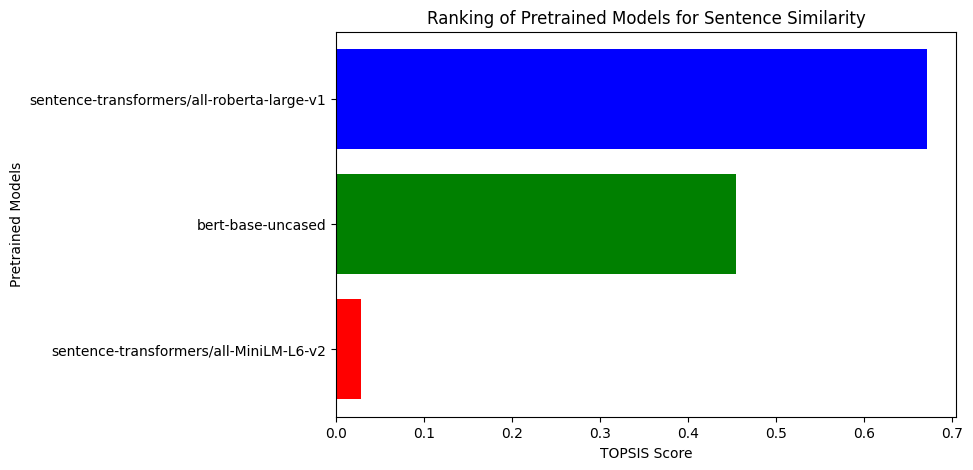

In [4]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Sort by rank for better visualization
df_sorted  =  df.sort_values("Rank")

# Using matplotlib for visualization
plt.figure(figsize = (8, 5))
# Using matplotlib for visualization
plt.barh(df_sorted["Model"], df_sorted["TOPSIS Score"], color = ['blue', 'green', 'red'])
# Using matplotlib for visualization
plt.xlabel("TOPSIS Score")
# Using matplotlib for visualization
plt.ylabel("Pretrained Models")
# Using matplotlib for visualization
plt.title("Ranking of Pretrained Models for Sentence Similarity")
# Using matplotlib for visualization
plt.gca().invert_yaxis()
# Using matplotlib for visualization
plt.show()


In [5]:
df.to_csv("Topsis_Results.csv", index = False)
print("Results saved to Topsis_Results.csv")


Results saved to Topsis_Results.csv


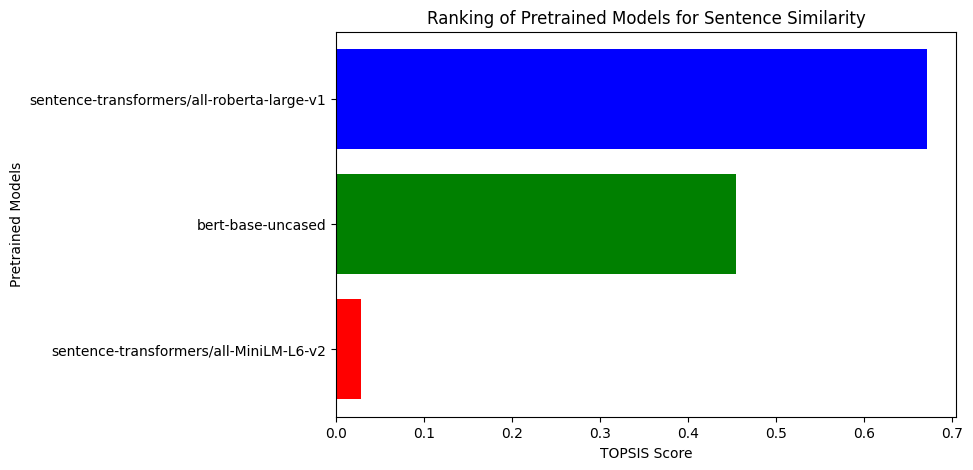

Graph saved as Topsis_Ranking.png


In [6]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Sort by rank for better visualization
df_sorted  =  df.sort_values("Rank")

# Using matplotlib for visualization
plt.figure(figsize = (8, 5))
# Using matplotlib for visualization
plt.barh(df_sorted["Model"], df_sorted["TOPSIS Score"], color = ['blue', 'green', 'red'])
# Using matplotlib for visualization
plt.xlabel("TOPSIS Score")
# Using matplotlib for visualization
plt.ylabel("Pretrained Models")
# Using matplotlib for visualization
plt.title("Ranking of Pretrained Models for Sentence Similarity")
# Using matplotlib for visualization
plt.gca().invert_yaxis()

# Save graph as a PNG file
# Using matplotlib for visualization
plt.savefig("Topsis_Ranking.png", dpi = 300, bbox_inches = 'tight')
# Using matplotlib for visualization
plt.show()

print("Graph saved as Topsis_Ranking.png")
